# Logistic Regression Mdel with PyTorch.

## Introduction

In this NoteBook, I will  build a logistic regression model with PyTorch and perform training and prediction on the MNIST dataset.


## Inporting the nessecry models:
 
 
* numpy: Provides high-performance array data structures and mathematical functions for numerical computing. Used for data preprocessing, feature engineering, and model training.

* matplotlib: A comprehensive library for creating visualizations and plots. Widely used for visualizing data, plotting training progress, and inspecting predictions.

* seaborn: A statistical plotting library based on matplotlib, offering high-level functions for aesthetically pleasing and informative statistical plots.

* pandas: A powerful data analysis and manipulation library. Used for loading datasets, handling missing values, and performing data cleaning tasks.

* torch: The core library for deep learning with PyTorch. Provides a framework for defining, training, and evaluating neural networks.

* pathlib: Provides an object-oriented interface for working with file paths, improving readability and conciseness.

* torchvision: Contains datasets, image transformations, and pre-trained models for computer vision tasks, designed to work seamlessly with PyTorch.

* torch.utils.data: Offers tools for loading and handling datasets, including functions for creating efficient data loaders that iterate over batches during training and evaluation.

* random_split: A function in torch.utils.data for splitting datasets into training, validation, and test subsets, a common practice in machine learning.

* sampler: A module in torch.utils.data providing different sampling strategies for data loaders, useful for handling specific data distributions.

* torch.nn: The core building blocks for neural networks in PyTorch. Includes classes for defining layers, activation functions, and loss functions.

In [96]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader ,random_split ,sampler
import torch.nn as nn

 

CUDA (Compute Unified Device Architecture) is a parallel computing platform and programming model created by NVIDIA. It enables developers to utilize the computational power of NVIDIA's graphics processing units (GPUs) to accelerate their applications. GPUs are highly parallel processors specifically designed for handling large amounts of data simultaneously, making them ideal for computationally intensive tasks such as training deep learning models.

PyTorch is a deep learning library that integrates with CUDA, allowing developers to leverage the computational power of GPUs for their deep learning models. This can significantly improve the training speed of deep learning models, especially for large datasets or complex architectures.

In [97]:
# If you are using  GPUs  
use_cuda = True
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device:', device)

Using device: cpu


# PyTorch:  know The Tensors:

PyTorch is a versatile deep learning library that can handle various types of datasets, including irregular data like graphs, point clouds, and manifolds.

This brief tutorial will introduce you to some of its features for working with tensors, which are the fundamental data structures in PyTorch. For a more in-depth exploration of PyTorch, you can refer to the comprehensive tutorials available online at PyTorch's official website: https://pytorch.org/tutorials/.


In [98]:
# create a numpy array
numpy_array = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
pytorch_tensor = torch.from_numpy(numpy_array)

Let us find out what are the properties of this pytorch_tensor:😁

In [99]:
print(pytorch_tensor)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [100]:
#Print the type
print(type(pytorch_tensor))
print(pytorch_tensor.dtype)

<class 'torch.Tensor'>
torch.int64


In [101]:
#  print its shape
print(pytorch_tensor.shape)  # Output: torch.Size([2, 5])
 

torch.Size([2, 5])


In [102]:
#   print its size
print(pytorch_tensor.size())  # Output:  


torch.Size([2, 5])


In [103]:
#   create a new numpy array out of the tensor and print its size
new_numpy_array= np.array(pytorch_tensor)

print(new_numpy_array.size)

print(new_numpy_array)
 

10
[[0 1 2 3 4]
 [5 6 7 8 9]]


Let us create more  new tensors 😁.

In [104]:
# create a tensor of shape (3,5) filled with ones   and print  another one  filled with zeros   thwn print it
ones = torch.ones(3,5)
print(ones)
zeros = torch.zeros(3,5)
print(zeros)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [105]:
#  transpose the tensor  
#pytorch_tensor.transpose(1, 0)
torch.transpose(pytorch_tensor, 0, 1)

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])

Now change a value in the numpy array. Does the corresponding tensor change?

In [106]:
#  change value in numpy array and inspect the tensor 
numpy_array[0 ,0] = 70

print(numpy_array)

[[70  1  2  3  4]
 [ 5  6  7  8  9]]


In [107]:
print(pytorch_tensor)

tensor([[70,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]])


**YES**  

we can convert between the two formats easily, and changes in one will be reflected in the other.
This is because both NumPy and PyTorch use the same underlying C++ data structures for storing and manipulating numerical data.
 
**.**  

# Deep Learning Using Pytorch

 
Deep learning models are trained and evaluated using a process that involves data preparation, model definition, optimizer selection, loss function configuration, training and evaluation, and finally testing.
The general steps consist of:
1. Data Loading:

Choose a dataset suitable for the model's task.

Preprocess the data if necessary, such as resizing or normalizing images.

Split the data into three sets: training, validation, and testing.

2. Model Definition:

Specify the network architecture of the deep learning model.

Choose an optimizer algorithm, such as SGD or Adam, to update the model's parameters.

Select a loss function that measures the difference between the model's predictions and the ground truth.

3. Model Fitting:

Perform the forward pass, feeding the training data into the model to get predictions.

Calculate the loss by comparing the predictions to the ground truth.

Backpropagate the loss to compute gradients of the model's parameters.

Update the model's parameters using the optimizer.

Evaluate the model's performance on the validation set to monitor overfitting.

Repeat the training process for a specified number of epochs.

4. Model Evaluation:

Evaluate the trained model on the test set to assess itsgeneralizability.

Analyze the model's performance metrics to determine its effectiveness.
 


I will go through these steps in the course of this notebook.


## 1. Data Loading

### Loading the MNIST Dataset

It's crucial to familiarize yourself with the widely used MNIST dataset, which comprises handwritten digits. 

Prior to commencing any deep learning tasks, it's essential to interact with the dataset to gain a deeper grasp of its characteristics. This hands-on exploration will equip you with a thorough understanding of the data's structure and properties.

**Download** the train split of the MNIST dataset using torchvision dataset classes.

In [108]:
data_dir = pathlib.Path('data/')
mnist = datasets.MNIST(data_dir, download=True, train=True)

Let's check the some samples to see what MNIST looks like

Label: 5


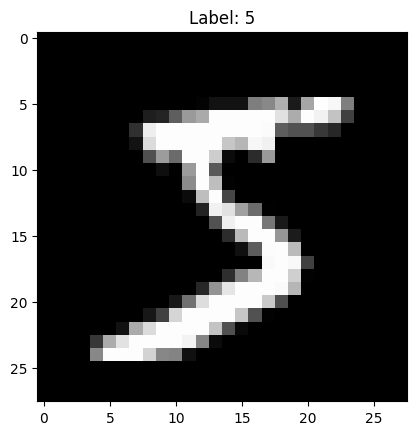

In [109]:
X_sample, y_sample = mnist[0]
#   display the label and the image
# Display the label
print(f"Label: {y_sample}")

# Display the image
plt.imshow(X_sample, cmap='gray')
plt.title(f"Label: {y_sample}")
plt.show()

Look at the types of X and y.

In [110]:
# : display types
print(f"Type of X_sample: {type(X_sample)}") #PIL.Image.Image 
print(f"Type of y_sample: {type(y_sample)}")# int


Type of X_sample: <class 'PIL.Image.Image'>
Type of y_sample: <class 'int'>


How many data points are there in the dataset?

In [111]:
# : print out the length of the dataset
print(f'length of dataset: {len(mnist)}') #The MNIST dataset has 60,000 training samples.

length of dataset: 60000


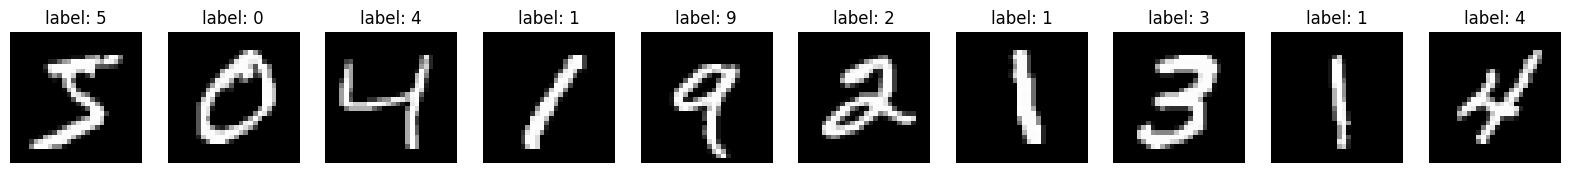

In [112]:
N = 10
fig, axes = plt.subplots(1, N, figsize=(2*N, 2))
X, y = mnist.data, mnist.targets
for ax, image, label in zip(axes.ravel(), X, y):
  ax.set_title("label: {}".format(label))
  ax.axis('off')
  ax.imshow(image.reshape(28,28), cmap='gray') # Remember, images are 28x28

 
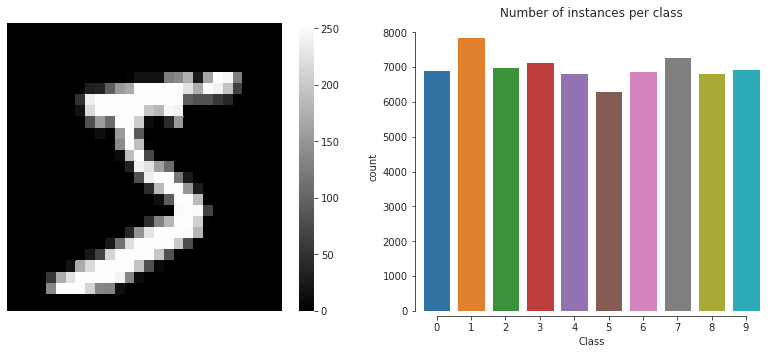


### Preprocessing the Data

#### Transformation

As we've observed, the dataset's contents are of type (PIL.Image.Image, Int). However, the core pytorch library can only handle torch.Tensor objects. To address this compatibility issue, we need to transform PIL.Image.Image to torch.Tensor. Fortunately, torchvision provides a convenient solution through the transforms.ToTensor transformation operation. It effectively converts PIL.Image.Image objects into torch.Tensors, enabling seamless interaction with the pytorch library.

In [113]:
mnist = datasets.MNIST(data_dir, download=True, train=True, transform=transforms.ToTensor())

#### Normalization


To further enhance the model's performance, we'll normalize the input data by subtracting the mean and dividing by the standard deviation for each channel. This normalization ensures that the data distribution is centered around zero and has a consistent variance, which can improve the model's learning process.

In [114]:
tmp_dataloader = torch.utils.data.DataLoader(mnist, batch_size=len(mnist), shuffle=True)

In [115]:
#  calculate the mean and standard deviation of MNIST train dataset

# Concatenate all images along the batch dimension to calculate mean and std
all_images = torch.cat([image for image, label in mnist], dim=0)

# Calculate mean and std
mean = all_images.mean()
std = all_images.std()

print("Mean:", mean.item())
print("Standard Deviation:", std.item())

Mean: 0.13066047430038452
Standard Deviation: 0.30810782313346863


In [116]:
mnist_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

### Training, Validation and Test Sets

To effectively train a neural network model, we require three distinct dataset segments: one for training, another for validation during the training process, and finally, one for testing the model's performance on unseen data.

It's crucial to emphasize that the test set should not be utilized during the training or model selection procedures. It solely serves as a benchmark for evaluating the final model'sgeneralizability to unseen data.

In [117]:
#   download the dataset for training and testing, with normalization transform
# Download the MNIST train dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transforms)

# Download the MNIST test dataset
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transforms)

In [118]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(tensor(0.1307),), std=(tensor(0.3081),))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(tensor(0.1307),), std=(tensor(0.3081),))
           )


To effectively train the model, we need to divide the training dataset into two subsets: one for training and the other for validating the model's performance during the training process. While the training set should be substantial to adequately train the model, the validation set can be relatively smaller. In this case, I'll allocate 10% of the dataset for validation purposes.

To ensure fairness and reproducibility, I'll randomly assign samples to the training and validation sets. This random assignment will prevent any inherent bias in the dataset from influencing the splitting process.

In [119]:
train_dataset_size = len(mnist_train)
print(train_dataset_size)
validation_split = int(0.1 * train_dataset_size)
print(validation_split)

60000
6000


In [120]:
#  split the train dataset in mnist_train and mnist_val

# Assuming mnist_train is your original training dataset
dataset_size = len(mnist_train)
validation_split = int(0.1 * dataset_size)
training_split = dataset_size - validation_split

# Set a fixed seed for reproducibility
torch.manual_seed(42)

# Use random_split to split the dataset
mnist_train, mnist_val = random_split(mnist_train, [training_split, validation_split])

# Print the sizes of the training and validation sets
print(f"Training set size: {len(mnist_train)}")
print(f"Validation set size: {len(mnist_val)}")
 

Training set size: 54000
Validation set size: 6000


To prepare the data for training the model, we need to create dataloaders. Dataloaders are objects that efficiently iterate over a dataset and load batches of random samples. We will use the specified batch size to ensure that the training process is efficient and effective. Additionally, we will shuffle the data to prevent the model from memorizing the training data and overfitting.

In [121]:
batch_size = 256

In [122]:
#  create dataloader for training, validation and test

# Create dataloaders
train_dataloader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset=mnist_val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=True)


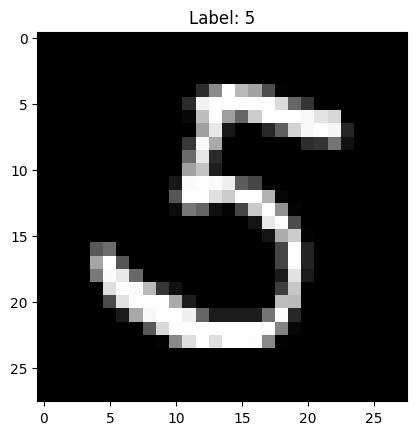

In [123]:
#  display an element of the train_dataloader
# Get one batch from the dataloader
for batch in train_dataloader:
    images, labels = batch

    # Display the first image in the batch
    plt.imshow(np.squeeze(images[0]), cmap='gray')
    plt.title(f"Label: {labels[0].item()}")
    plt.show()

    break  # Display only the first img for brevity


In [124]:
#  display the dimensions of x and y


# Get one batch from the dataloader
for batch in train_dataloader:
    x, y = batch

    # Display the dimensions
    print(f"Shape of x: {x.shape}")
    print(f"Shape of y: {y.shape}")

    break  # Display only the dimensions of the first batch for brevity

Shape of x: torch.Size([256, 1, 28, 28])
Shape of y: torch.Size([256])


 

The x tensor has a shape of  [batchsize, 1, 28, 28], indicating that it contains 256 batches (or whatever value was specified in the data loader), each containing a single channel (monochrome images) of dimensions 28 (height/rows) by 28 (width/columns).

The y tensor has a shape of [batchsize], meaning that it holds 256 labels (one for each image in the batch). These labels represent the digit that each image corresponds to.

 
Now, we need to specify the **model architecture** for training on the data. 

In this simplified example, a single fully-connected layer suffices to produce a predicted label for a given training image.



Before constructing the model, we need to define a few parameters:

* The input and output sizes of the fully-connected layer, which determine the number of features extracted from the input image and the number of possible labels (digits).

* The number of epochs, which represents the total number of training iterations over the entire dataset.Generally, a higher number of epochs allows the model to learn more complex patterns in the data, leading to better performance. However, excessive epochs can lead to overfitting.

* The learning rate, which controls the step size of the gradient descent optimization algorithm.


In [125]:
epochs = 5 # somehow randomly, #an epoch refers to a single pass through the entire training dataset
input_dim = 28 * 28
output_dim = 10 # As we're trying to classify digits 0-9 a total of 10 classes, our output dimension is 10.
lr = 0.001 #learning rate

In [126]:
class LogisticRegression(torch.nn.Module):
    """
    Logistic regression model inherits the torch.nn.Module 
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LogisticRegression, self).__init__()
        #  define linear layer for the model
        self.linear = nn.Linear(input_dim, output_dim)



    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        #  flatten the input to a suitable size for the initial layer
        x = x.view(x.size(0), -1)

        #  run the data through the layer
        outputs = self.linear(x)
        return outputs

### Instantiate the Model

To solidify our understanding, let's instantiate the model and examine its internal structure. This step serves as a crucial sanity check, ensuring that the model adheres to the specified architecture. This is particularly valuable when creating layers dynamically, as it facilitates thorough inspection, verification, and debugging.

In [127]:
#   instantiate the model
input_dim = 28 * 28  #   input images are 28x28 pixels
output_dim = 10   #As we're trying to classify digits 0-9 a total of 10 classes, our output dimension is 10

# Instantiate the LogisticRegression model
model = LogisticRegression(input_dim, output_dim)

# Print the model architecture
print(model)


LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [128]:
#  put the model in train mode
model.train() # when I run this, it reduces the accuracy, I am searching for the reason!!

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

### 2. Model Definition:

### Define a Loss Function

 
Since our task involves multi-class classification (classifying data into multiple categories), we employ the softmax function as the activation function for the final layer of our neural network. Softmax transforms the output of the final layer into a probability distribution, where the values range between 0 and 1 and sum up to 1 across all categories.

After the softmax layer, we calculate the cross-entropy loss function to measure the difference between the predicted probability distribution and the actual target distribution. Cross-entropy quantifies the "distance" between the two distributions, indicating how well the model's predictions align with the true labels.

 

It does 2 things at the same time.
1. Computes softmax (logistic/softmax function)
2. Computes cross entropy

 

In [129]:
#   define the loss function
loss_function = nn.CrossEntropyLoss()  

### Specify the Optimizer

The optimizer serves as the learning algorithm that guides the model's training process. In this instance, we employ Stochastic Gradient Descent (SGD), a popular optimization technique for training neural networks.

SGD iteratively adjusts the model's parameters based on the gradient of the loss function. By continuously evaluating the gradient, SGD effectively minimizes the loss and improves the model's predictions.

In [130]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## 3. Model Fitting

### Train the Model

Everything is now in place to begin training the model. The training process consists of two main phases: the forward pass and the backward pass.

During the forward pass, the model makes predictions for the images in the data loader. These predictions are compared to the actual labels to calculate the loss, which measures the difference between the predicted labels and the true labels.

The backward pass is where the model learns from its mistakes. The gradient of the loss with respect to the model's weights is calculated. This gradient tells the model which weights to update to reduce the loss. The weights are then updated in the direction of the gradient.

This process is repeated for many epochs, which are a series of forward and backward passes. Over time, the model will learn to make more accurate predictions

In [131]:
#EXPLOR
# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())
print(list(model.parameters())[1].numel())


<generator object Module.parameters at 0x299e8de00>
2
torch.Size([10, 784])
torch.Size([10])
10


In [132]:
 

iter = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_dataloader):
        #Uses enumerate to loop over batches in the train_dataloader, 
        # providing both the batch index i and the batch data (images and labels).
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_() #Reshapes the input images (images.view(-1, 28*28)) into a flat format.
                                                         #Flags the reshaped images as requiring gradients (requires_grad_()), 
                                                         # indicating they will participate in gradient computation during backpropagation.
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad() #   to avoid accumulating gradients from previous iterations.

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward() #Computes gradients of the loss with respect to the model parameters using backpropagation.

        # Updating parameters
        optimizer.step() #Updates the model parameters using the computed gradients and the optimization algorithm.

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_dataloader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7486609816551208. Accuracy: 82.68000030517578
Iteration: 1000. Loss: 0.6272605061531067. Accuracy: 86.08999633789062


### Make a Prediction

Now the model has undergone extensive training, we can assess its predictive capabilities by evaluating it on unseen images from the test dataset.

Execute this cell multiple times to observe the model's consistency in its predictions. Subsequently, increase the number of epochs to 10 and repeat the process to gauge whether the model's accuracy improves with prolonged training.


In [133]:
#after trained the model, extract the accuracy calculation portion to understand what's happening without re-training the model.
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS '  , outputs)
 
        

       


OUTPUTS  tensor([[ 0.8381, -3.0650, -0.2396,  ..., -0.8977,  2.9386,  0.9428],
        [-0.2512, -3.8155,  0.4178,  ..., -1.3231,  1.6170,  2.8149],
        [-1.5688, -2.3396, -0.6047,  ..., -1.0591,  3.0734, -0.2231],
        ...,
        [ 1.0811, -1.4910, -0.4227,  ...,  0.1564,  0.6149, -1.6608],
        [-1.2519, -0.3215, -0.1507,  ...,  0.0808,  1.3757,  3.0083],
        [ 1.0274, -2.8675,  1.0475,  ..., -2.0175,  0.0597, -1.9681]],
       grad_fn=<AddmmBackward0>)


In [134]:
iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('OUTPUTS '  , outputs)
        print('PREDICTION')
        print(predicted[0])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE ...')
        print(labels[0])

OUTPUTS  tensor([[-1.0187, -3.4788, -2.0018,  ...,  5.5865, -0.3989,  3.5060],
        [-2.1172, -2.4473, -1.2955,  ...,  6.5365, -0.0325,  2.3989],
        [ 0.5735, -2.4170,  1.8628,  ..., -1.7945, -0.3629, -0.1136],
        ...,
        [-0.5572, -2.4094,  0.2539,  ..., -2.5107,  3.9659, -0.9443],
        [-1.3212, -2.7215, -0.5247,  ...,  0.2647,  1.1507,  3.3866],
        [-0.7663, -1.9208,  4.8959,  ..., -1.5051,  0.1645, -1.9800]],
       grad_fn=<AddmmBackward0>)
PREDICTION
tensor(7)
LABEL SIZE
torch.Size([256])
LABEL FOR IMAGE ...
tensor(7)


In [ ]:
'''iter_test = 0
for images, labels in test_dataloader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    print('OUTPUTS ', outputs)
    print('PREDICTIONS')
    for i in range(len(predicted)):
        print(predicted[i])
        # Get the maximum value and its index along the second dimension
        max_value, max_index = torch.max(outputs[i], dim=0)
        print('Maximum value:', max_value.item())
        print('Index of Maximum value:', max_index.item())

    print('LABEL SIZE')
    print(labels.size())

    print('LABELS FOR IMAGES ...')
    for i in range(len(labels)):
        print(labels[i]) '''  


In [136]:
save_model = False
if save_model is True:  
    # Saves only parameters
    torch.save(model.state_dict(), 'PytorchAndlLogisticRegression_model.pkl')

###  Plot the Training and Validation loss and accuracy

A more detailed examination of the training process is warranted, including how the training error changes over time and how the accuracy (ideally) improves as the model is trained for longer periods.

Here, I am going to **refine the training process** and **save the important information for plotting**.

In [137]:
#  write a function that calculates the accuracy
def accuracy(correct, total): 
    """
    function to calculate the accuracy given the
        correct: number of correctly classified samples
        total: total number of samples
    returns the ratio
    """
    
    
    return (correct / total) *100

In [148]:
 
accuracy_ratio = accuracy(correct, total)
print(f"Accuracy: {accuracy_ratio:.2f}%")

Accuracy: 86.09%


In [139]:
#  refine the training function from above
# it should contain:
# - saving of losses
# - calculation of accuracy
# - returning the mean loss and accuracy
def train_function(model, train_dataloader, loss_function):
    """
    Train the given model using the provided data and hyperparameters.

    Parameters:
    - model: The PyTorch model to be trained
    - train_dataloader: Dataloader for the training dataset
    - optimizer: The optimization algorithm
    - loss_function: The loss function
    - epochs: Number of training epochs

    Returns:
    - mean_loss: Mean loss over all batches
    - accuracy: Accuracy over all batches
    - losses: List of losses for each batch
    """

    losses = []  # List to store losses for each batch
    correct = 0  # Counter for correctly classified samples
    total = 0    # Counter for total samples

    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_dataloader):
            # Load images as Variable
            images = images.view(-1, 28*28).requires_grad_()
            labels = labels
            
            # Delete the gradients from the last training iteration
            optimizer.zero_grad()

            # Forward pass: get predictions
            y_pred = model(images)

            # Compute loss
            loss = loss_function(y_pred, labels)

            # Backward pass -> calculate gradients, update weights
            loss.backward()
            optimizer.step()

            # Save loss for this batch
            losses.append(loss.item())

            # Calculate Accuracy
            _, predicted = torch.max(y_pred.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate mean loss and accuracy
    mean_loss = sum(losses) / len(losses)
    accuracy = correct / total

    return  mean_loss  ,   accuracy   


In [140]:
train_function(model, train_dataloader, loss_function)



(0.5219158532777669, 0.8668185185185185)

In [141]:
#   write a validation function that calculates the loss and accuracy on the validation set
# you can also combine it with the training function

def validate_function(model, dataloader, loss_function):
    """
    Function to validate the model on a validation set.

    Args:
        model: The PyTorch model.
        dataloader: DataLoader for the validation set.
        loss_function: Loss function for optimization.

    Returns:
        Tuple containing the average loss and accuracy on the validation set.
    """
    model.eval()  # Set the model to evaluation mode

    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(-1, 28 * 28).requires_grad_()
            labels = labels

            # Forward pass
            outputs = model(images)
            loss = loss_function(outputs, labels)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            total_loss += loss.item()

    # Calculate average loss and accuracy
    avg_loss = total_loss / len(dataloader)
    accuracy_val = correct / total

    return   avg_loss,  accuracy_val


In [142]:
validate_function(model, val_dataloader, loss_function)

(0.4814356416463852, 0.874)

In [143]:
#   write a run_training function that 
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses, train_accs, val_accs as arrays for each epoch

def run_training(model, train_dataloader, val_dataloader, loss_function, epochs):
    """
    Function to run the training loop.

    Args:
        model: The PyTorch model.
        train_dataloader: DataLoader for the training set.
        val_dataloader: DataLoader for the validation set.
        loss_function: Loss function for optimization.
        optimizer: Optimizer for updating model parameters.
        epochs: Number of training epochs.

    Returns:
        Tuple containing lists of train_losses, val_losses, train_accs, val_accs for each epoch.
    """
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(epochs):
        # Train the model and get the average loss and accuracy for the epoch
        train_loss, train_acc = train_function(model, train_dataloader, loss_function)

        # Validate the model on the validation set and get the average loss and accuracy
        val_loss, val_acc = validate_function(model, val_dataloader, loss_function)

        # Save the metrics for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # Print the metrics for each epoch
        print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return train_losses, val_losses, train_accs, val_accs


In [149]:
#   call the run_training function and run it for 20 epochs.
num_epochs = 20
 
 
# Call the run_training function
train_losses, val_losses, train_accs, val_accs = run_training(model, train_dataloader, val_dataloader, loss_function, num_epochs)


Epoch [1/20], Train Loss: 0.3290, Train Acc: 0.9074, Val Loss: 0.3389, Val Acc: 0.9023
Epoch [2/20], Train Loss: 0.3255, Train Acc: 0.9084, Val Loss: 0.3359, Val Acc: 0.9037
Epoch [3/20], Train Loss: 0.3223, Train Acc: 0.9094, Val Loss: 0.3363, Val Acc: 0.9045
Epoch [4/20], Train Loss: 0.3195, Train Acc: 0.9102, Val Loss: 0.3305, Val Acc: 0.9047
Epoch [5/20], Train Loss: 0.3169, Train Acc: 0.9108, Val Loss: 0.3295, Val Acc: 0.9055
Epoch [6/20], Train Loss: 0.3145, Train Acc: 0.9115, Val Loss: 0.3297, Val Acc: 0.9065
Epoch [7/20], Train Loss: 0.3123, Train Acc: 0.9124, Val Loss: 0.3252, Val Acc: 0.9068
Epoch [8/20], Train Loss: 0.3103, Train Acc: 0.9130, Val Loss: 0.3259, Val Acc: 0.9068
Epoch [9/20], Train Loss: 0.3084, Train Acc: 0.9135, Val Loss: 0.3227, Val Acc: 0.9068
Epoch [10/20], Train Loss: 0.3067, Train Acc: 0.9139, Val Loss: 0.3203, Val Acc: 0.9075
Epoch [11/20], Train Loss: 0.3050, Train Acc: 0.9143, Val Loss: 0.3199, Val Acc: 0.9083
Epoch [12/20], Train Loss: 0.3035, Train 

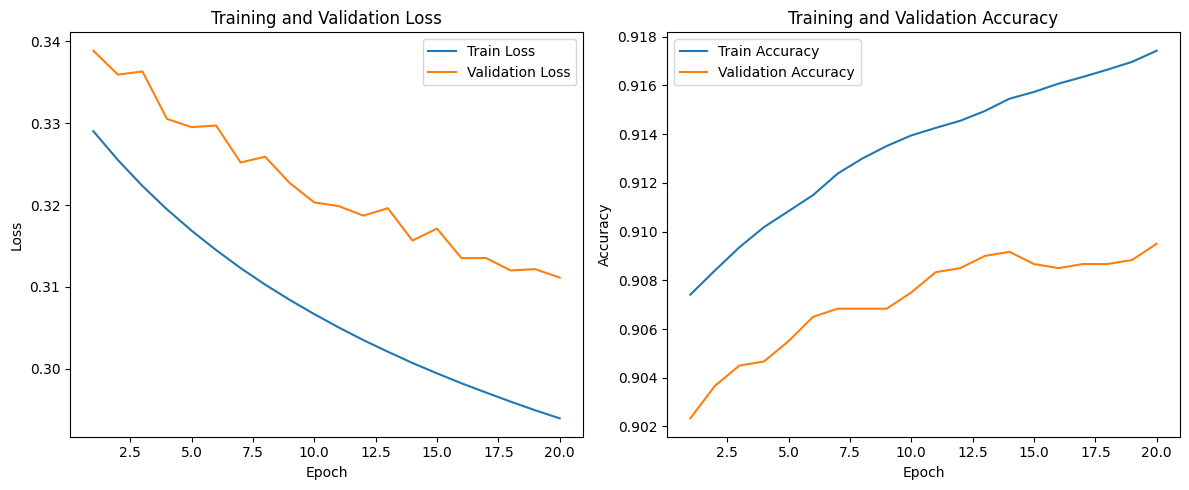

In [151]:
#  write a plot function
import matplotlib.pyplot as plt

def plot_metrics(train_losses, val_losses, train_accs, val_accs, num_epochs):
    """
    Plot training and validation metrics.

    Parameters:
    - train_losses: List of training losses for each epoch
    - val_losses: List of validation losses for each epoch
    - train_accs: List of training accuracies for each epoch
    - val_accs: List of validation accuracies for each epoch
    - num_epochs: Total number of epochs
    """

    # Plot Losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracies
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accs, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accs, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

 
# A  train_losses, val_losses, train_accs, val_accs from   training
plot_metrics(train_losses, val_losses, train_accs, val_accs, num_epochs)


The accuracy curve shows a similar pattern to the loss curve, with the accuracy increasing from around 0.892 to 0.896. This also indicates that the model is learning to better classify the handwritten digits.

Overall, the loss and accuracy curves look as expected, suggesting that the model is learning and improving over time. The slight difference between the training and validation loss suggests that the model is not overfitting, which is a good sign.

Here are some reasons that could lead to that loss and accuracy might not look as expected:

* The model is not complex enough: If the model is too simple, it may not be able to capture the complex patterns in the data. This could lead to plateaus in the loss and accuracy curves.

* The model is overfitting: If the model is too complex or if the training data is too small, it may start to memorize the training data instead of learning generalizable patterns. This can lead to a decrease in the validation loss and accuracy, even as the training loss continues to improve.

* The hyperparameters are not tuned correctly: The learning rate, batch size, and other hyperparameters can significantly impact the training process. If these hyperparameters are not chosen correctly, they can lead to slow convergence, overfitting, or underfitting.

 ### The confusion matrix

The confusion matrix is a table that summarizes the performance of a classification model. 
It is constructed by comparing the predicted labels of a model to the true labels of the data. 
The confusion matrix is a powerful tool for understanding the strengths and weaknesses of a model.
 It can be used to identify which classes are most challenging for the model to predict,and to assess the overall accuracy of the model.

 

The elements in a confusion matrix:

True Positives (TP): Instances where the model correctly predicts the positive class.

True Negatives (TN): Instances where the model correctly predicts the negative class.

False Positives (FP): Instances where the model incorrectly predicts the positive class (false alarm).

False Negatives (FN): Instances where the model incorrectly predicts the negative class (miss).

In [152]:
#   write a function to calculate the confusion values
from sklearn.metrics import confusion_matrix
 

def calculate_confusion_matrix(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.view(-1, 28 * 28).requires_grad_()

            # Forward pass
            outputs = model(images)

            # Get predictions
            _, predicted = torch.max(outputs.data, 1)

            # Append true labels and predictions
            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_predictions)

    return conf_matrix


The confusion matrix can be **normalized** by dividing each entry in the matrix by the sum of all entries in that column. This will give you the proportion of predictions for each class that were correct, incorrect, or false negatives/false positives.

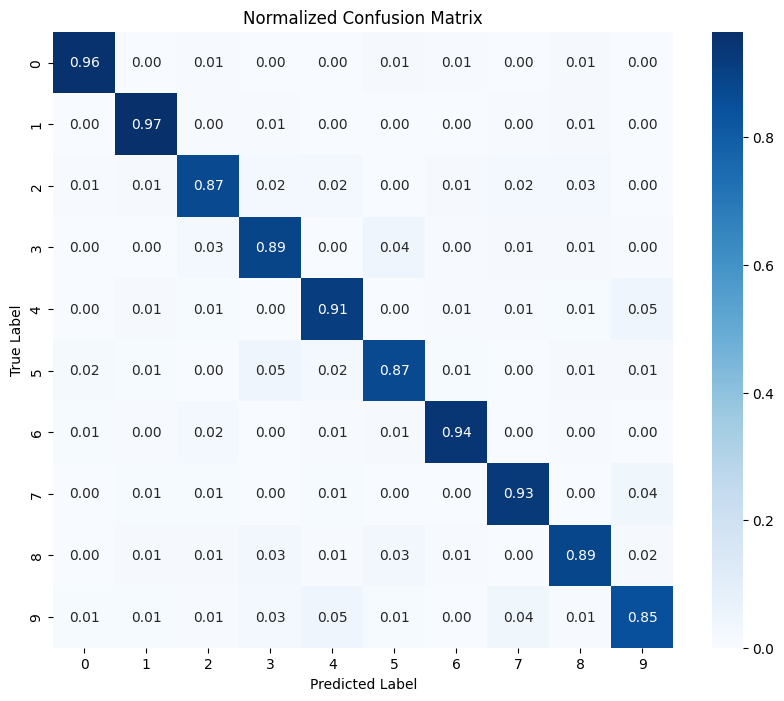

In [153]:
#   normalize and plot the confusion matrix

def plot_confusion_matrix(conf_matrix, classes):
    normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

#   (digits 0-9)
#numel() function in PyTorch is short for "number of elements." 
# It returns the total number of elements in the tensor.
class_names = [str(i) for i in range(list(model.parameters())[1].numel())]


#  Call 
conf_matrix = calculate_confusion_matrix(model, val_dataloader)
plot_confusion_matrix(conf_matrix, class_names)



* Diagonal Elements (Top-Left to Bottom-Right):

These elements represent the number of correct predictions for each digit.
The larger these values, the better the model performs on those digits.

* Off-Diagonal Elements:

These elements represent the number of misclassifications between digits.
Larger values indicate frequent confusion between the corresponding digits.
For example, if the element (3, 5) is relatively high, it indicates that the model often confuses the digit "3" with the digit "5" and the same applies for element (4, 9)


THIS SOLUTION WITH HELP OF: 
1. Ritchie Ng, J. F. (2023). ritchieng/deep-learning-wizard: Cleaned Stable Release (v1.0.2). Zenodo. https://doi.org/10.5281/zenodo.8401297 

2. Chat GPT 

3. Google Bard

